In [ ]:
!pip install matplotlib seaborn opencv-python pillow numpy

In [ ]:
from google.colab import files
import zipfile
import os

# Upload ZIP file manually
uploaded = files.upload()

# Extract the ZIP file
zip_filename = list(uploaded.keys())[0]  # Get uploaded file name
extract_path = "/content/Brain_Tumor_MRI_Dataset"

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify extraction
print("Extracted folders:", os.listdir(extract_path))


Saving Brain_Tumor_MRI_Dataset.zip to Brain_Tumor_MRI_Dataset.zip
Extracted folders: ['Testing', 'Training']


In [ ]:
import zipfile
import os

# Define the path where the ZIP file is located
zip_path = "/content/Brain_Tumor_MRI_Dataset.zip"
extract_path = "/content/Brain_Tumor_MRI_Dataset"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted files
print("Extracted folders:", os.listdir(extract_path))


Extracted folders: ['Testing', 'Training']


In [ ]:
import os

extract_path = "/content/Brain_Tumor_MRI_Dataset"  # Path where ZIP was extracted

train_path = os.path.join(extract_path, "Training")
test_path = os.path.join(extract_path, "Testing")

print("Train Folder Contents:", os.listdir(train_path)[:5])  # Show some train data
print("Test Folder Contents:", os.listdir(test_path)[:5])  # Show some test data


Train Folder Contents: ['pituitary', 'notumor', 'glioma', 'meningioma']
Test Folder Contents: ['pituitary', 'notumor', 'glioma', 'meningioma']


In [ ]:
import os

# Function to count images in each category
def count_images(directory):
    category_counts = {}
    for category in os.listdir(directory):
        path = os.path.join(directory, category)
        if os.path.isdir(path):  # Ensure it's a directory
            category_counts[category] = len(os.listdir(path))
    return category_counts

# Define dataset paths
train_path = "/content/Brain_Tumor_MRI_Dataset/Training"
test_path = "/content/Brain_Tumor_MRI_Dataset/Testing"

# Count images in training and testing sets
train_counts = count_images(train_path)
test_counts = count_images(test_path)

# Print results
print("Training Data Distribution:", train_counts)
print("Testing Data Distribution:", test_counts)


Training Data Distribution: {'pituitary': 1457, 'notumor': 1595, 'glioma': 1321, 'meningioma': 1339}
Testing Data Distribution: {'pituitary': 300, 'notumor': 405, 'glioma': 300, 'meningioma': 306}


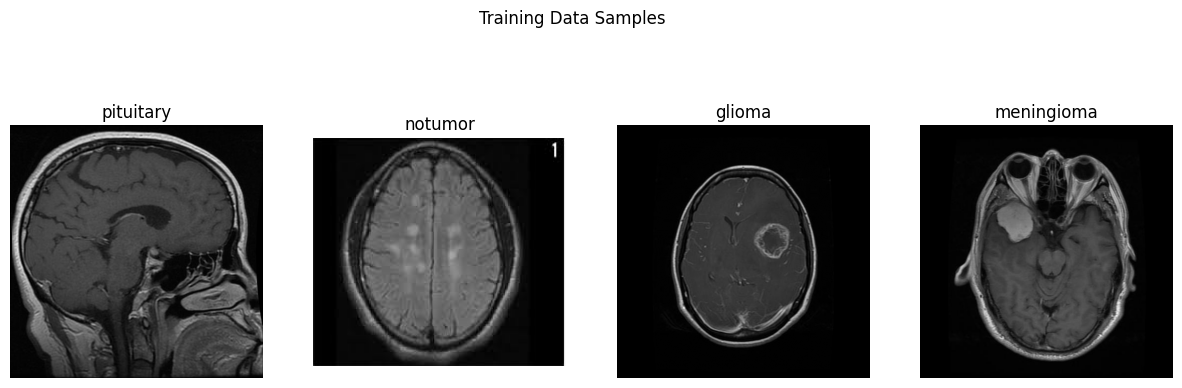

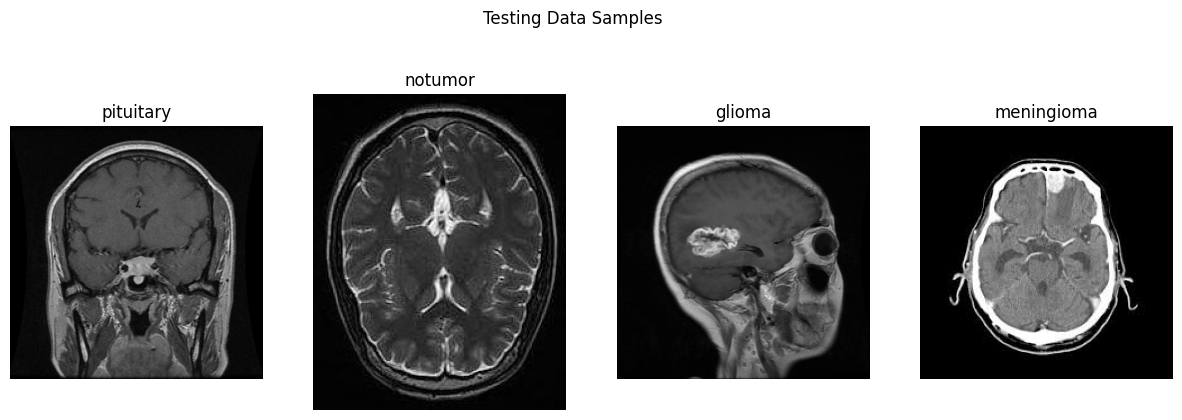

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Function to display images
def show_sample_images(base_path, categories, title):
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))

    for i, category in enumerate(categories):
        path = os.path.join(base_path, category)
        img_file = random.choice(os.listdir(path))  # Pick a random image
        img = Image.open(os.path.join(path, img_file))

        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(category)
        axes[i].axis("off")

    plt.suptitle(title)
    plt.show()

# Define dataset paths
train_path = "/content/Brain_Tumor_MRI_Dataset/Training"
test_path = "/content/Brain_Tumor_MRI_Dataset/Testing"

# Get category names
train_categories = os.listdir(train_path)
test_categories = os.listdir(test_path)

# Show Training Samples
show_sample_images(train_path, train_categories, "Training Data Samples")

# Show Testing Samples
show_sample_images(test_path, test_categories, "Testing Data Samples")


In [ ]:
# Install OpenCV if not available
!pip install opencv-python

import cv2
import numpy as np
import os
from tqdm import tqdm  # Progress bar
import matplotlib.pyplot as plt

# Define dataset paths
train_path = "/content/Brain_Tumor_MRI_Dataset/Training"
test_path = "/content/Brain_Tumor_MRI_Dataset/Testing"

# Define image size
IMG_SIZE = 128

# Function to preprocess images
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize
    img = img / 255.0  # Normalize (0-1)
    return img

# Function to load images from a directory
def load_images_from_folder(folder_path):
    images = []
    labels = []

    for label, category in enumerate(os.listdir(folder_path)):  # Loop through tumor types
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            for img_file in tqdm(os.listdir(category_path), desc=f"Processing {category}"):
                img_path = os.path.join(category_path, img_file)
                img = preprocess_image(img_path)
                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels)

# Load Training and Testing Data
train_images, train_labels = load_images_from_folder(train_path)
test_images, test_labels = load_images_from_folder(test_path)

# Check shape
print(f"Training Data Shape: {train_images.shape}")
print(f"Testing Data Shape: {test_images.shape}")


Processing meningioma: 100%|██████████| 306/306 [00:01<00:00, 217.76it/s]


Training Data Shape: (5712, 128, 128)
Testing Data Shape: (1311, 128, 128)


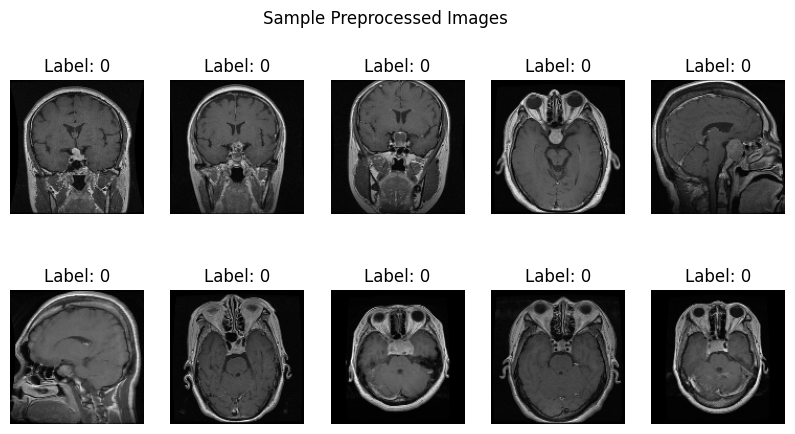

In [ ]:
# Show some preprocessed images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(train_images[i], cmap='gray')
    ax.axis("off")
    ax.set_title(f"Label: {train_labels[i]}")

plt.suptitle("Sample Preprocessed Images")
plt.show()

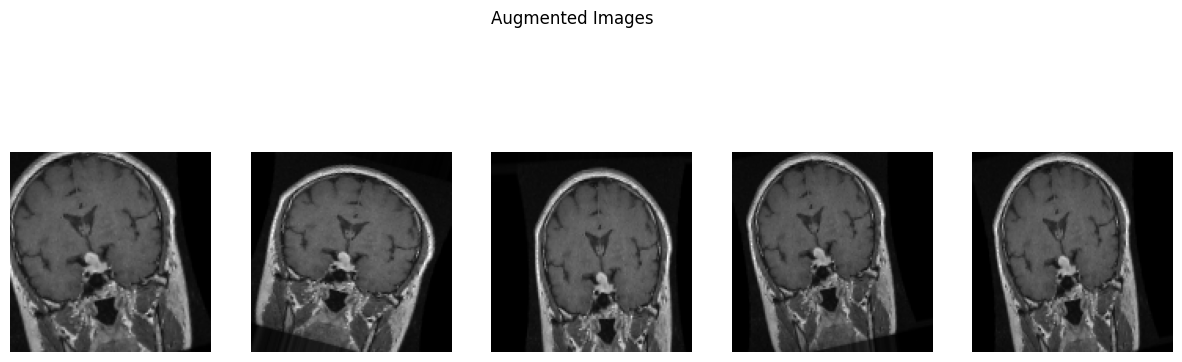

In [ ]:
# Install TensorFlow if not available
!pip install tensorflow

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Data Augmentation setup
datagen = ImageDataGenerator(
    rotation_range=30,  # Rotate images up to 30 degrees
    width_shift_range=0.1,  # Shift width by 10%
    height_shift_range=0.1,  # Shift height by 10%
    zoom_range=0.2,  # Zoom in/out
    horizontal_flip=True  # Flip images horizontally
)

# Expand dimensions for ImageDataGenerator
train_sample = np.expand_dims(train_images[0], axis=-1)  # Add channel dimension

# Visualize augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, batch in enumerate(datagen.flow(train_sample.reshape((1, IMG_SIZE, IMG_SIZE, 1)), batch_size=1)):
    axes[i].imshow(batch[0].squeeze(), cmap="gray")  # Convert back to grayscale
    axes[i].axis("off")
    if i == 4: break  # Show 5 images

plt.suptitle("Augmented Images")
plt.show()


In [ ]:
!pip install tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

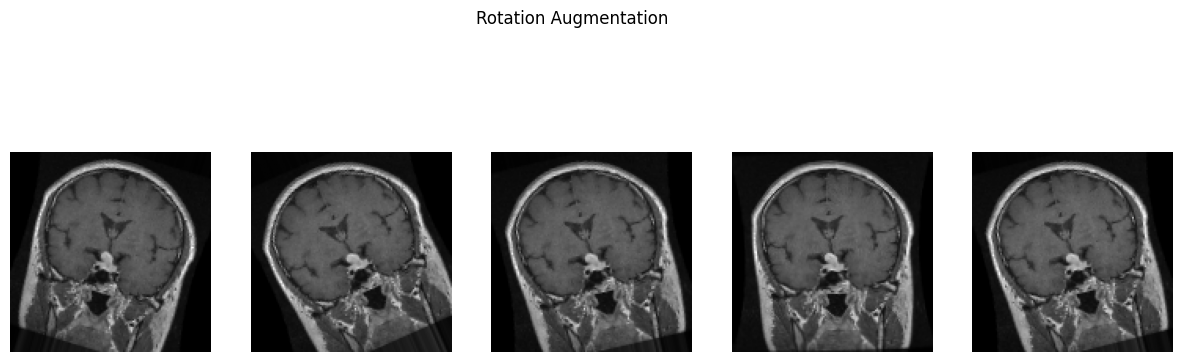

In [ ]:
# Rotation (up to 30 degrees)
datagen_rotate = ImageDataGenerator(rotation_range=30)

# Generate augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, batch in enumerate(datagen_rotate.flow(train_sample.reshape((1, IMG_SIZE, IMG_SIZE, 1)), batch_size=1)):
    axes[i].imshow(batch[0].squeeze(), cmap="gray")
    axes[i].axis("off")
    if i == 4: break

plt.suptitle("Rotation Augmentation")
plt.show()


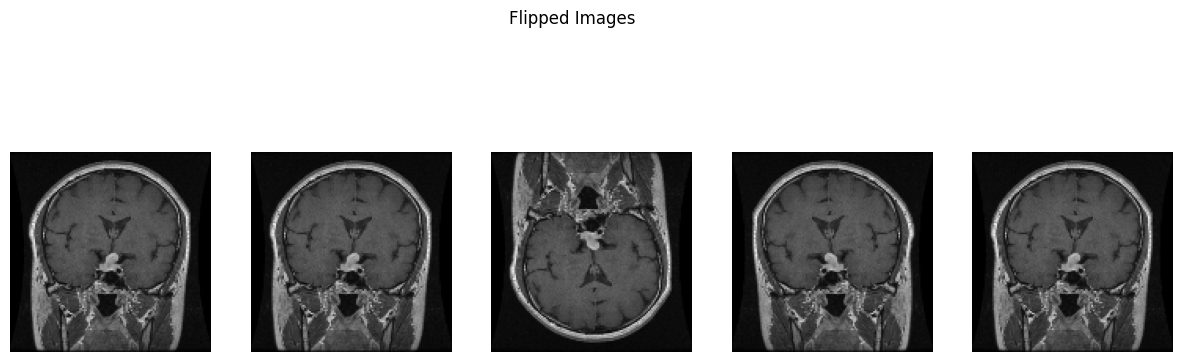

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Ensure input shape is (1, 128, 128, 1) → (batch_size, height, width, channels)
sample_image = np.expand_dims(train_images[0], axis=(0, -1))

# Define data augmentation
flip_datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# Generate augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, batch in enumerate(flip_datagen.flow(sample_image, batch_size=1)):
    axes[i].imshow(batch[0].squeeze(), cmap="gray")
    axes[i].axis("off")
    if i == 4:  # Stop after 5 images
        break

plt.suptitle("Flipped Images")
plt.show()


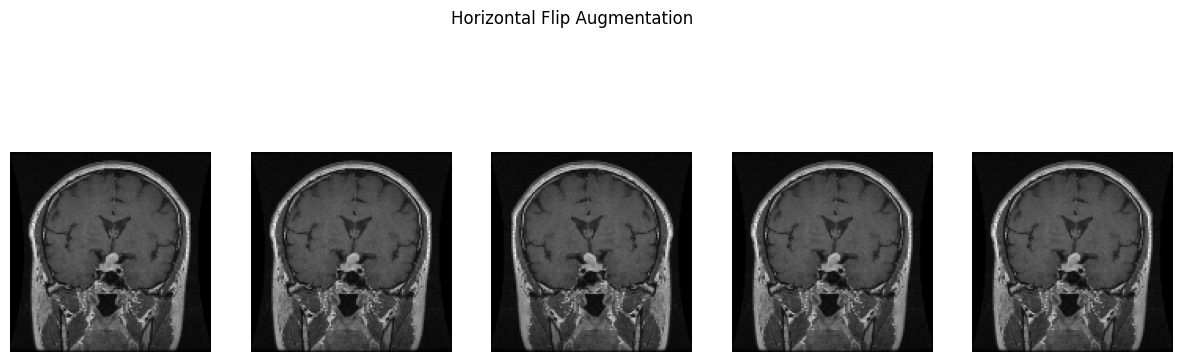

In [ ]:
# Horizontal Flip
datagen_flip = ImageDataGenerator(horizontal_flip=True)

# Generate augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, batch in enumerate(datagen_flip.flow(train_sample.reshape((1, IMG_SIZE, IMG_SIZE, 1)), batch_size=1)):
    axes[i].imshow(batch[0].squeeze(), cmap="gray")
    axes[i].axis("off")
    if i == 4: break

plt.suptitle("Horizontal Flip Augmentation")
plt.show()


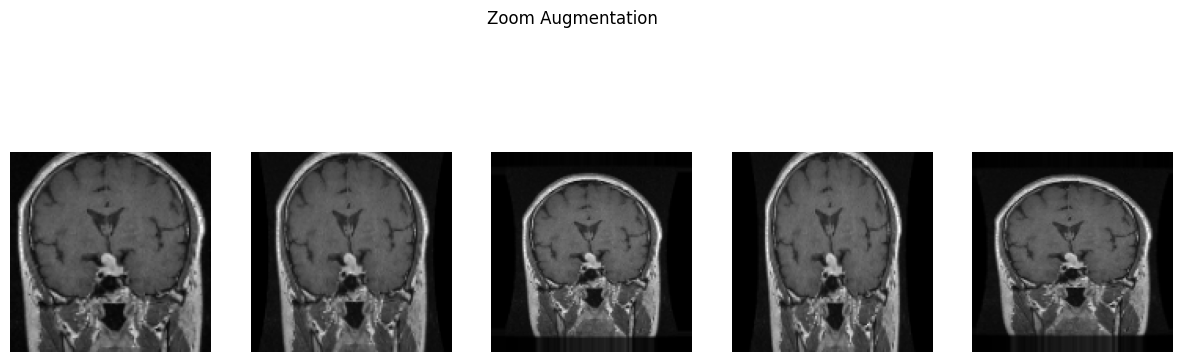

In [ ]:
# Zooming (20% in/out)
datagen_zoom = ImageDataGenerator(zoom_range=0.2)

# Generate augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, batch in enumerate(datagen_zoom.flow(train_sample.reshape((1, IMG_SIZE, IMG_SIZE, 1)), batch_size=1)):
    axes[i].imshow(batch[0].squeeze(), cmap="gray")
    axes[i].axis("off")
    if i == 4: break

plt.suptitle("Zoom Augmentation")
plt.show()


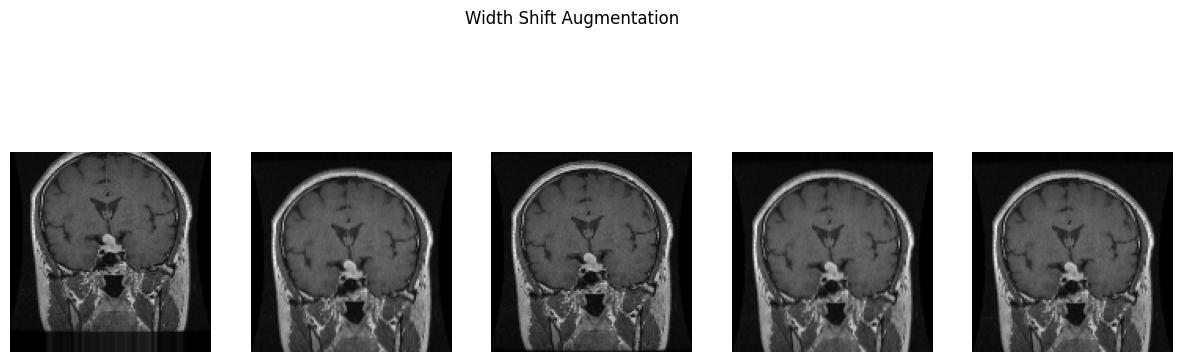

In [ ]:
# Width Shift (10%)
datagen_width_shift = ImageDataGenerator(width_shift_range=0.1)

# Generate augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, batch in enumerate(datagen_width_shift.flow(train_sample.reshape((1, IMG_SIZE, IMG_SIZE, 1)), batch_size=1)):
    axes[i].imshow(batch[0].squeeze(), cmap="gray")
    axes[i].axis("off")
    if i == 4: break

plt.suptitle("Width Shift Augmentation")
plt.show()


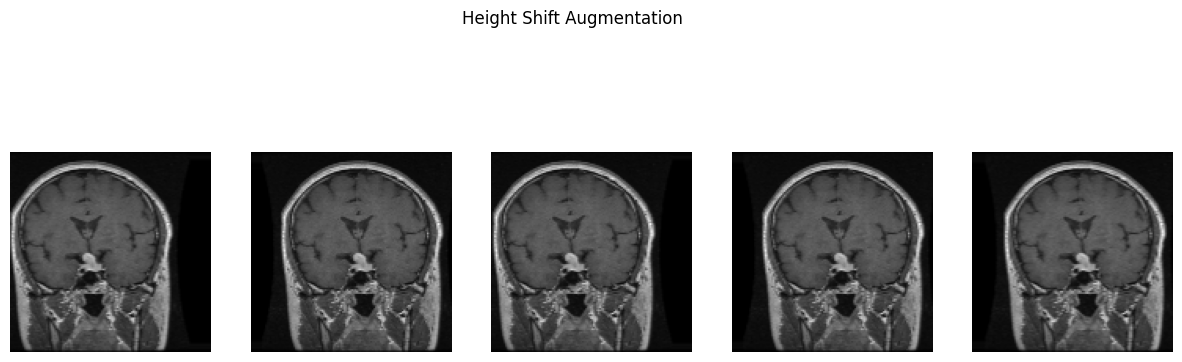

In [ ]:
# Height Shift (10%)
datagen_height_shift = ImageDataGenerator(height_shift_range=0.1)

# Generate augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, batch in enumerate(datagen_height_shift.flow(train_sample.reshape((1, IMG_SIZE, IMG_SIZE, 1)), batch_size=1)):
    axes[i].imshow(batch[0].squeeze(), cmap="gray")
    axes[i].axis("off")
    if i == 4: break

plt.suptitle("Height Shift Augmentation")
plt.show()


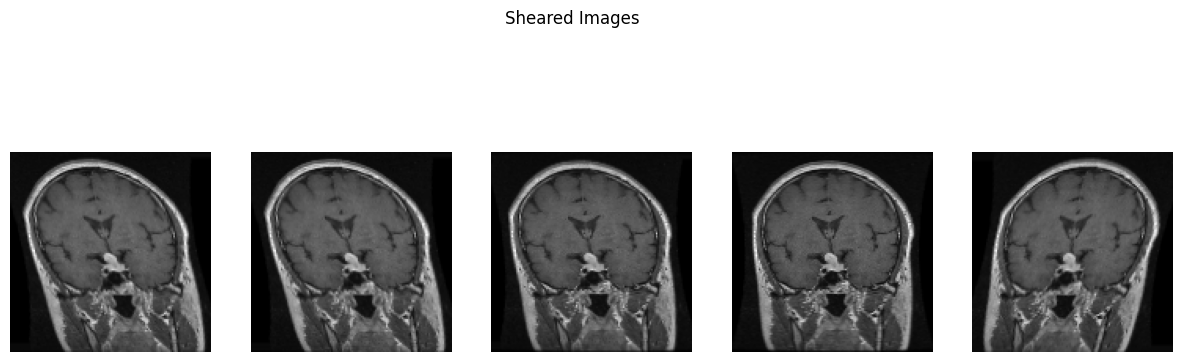

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Ensure input shape is (1, 128, 128, 1) → (batch_size, height, width, channels)
sample_image = np.expand_dims(train_images[0], axis=(0, -1))

# Define Shearing augmentation
shear_datagen = ImageDataGenerator(shear_range=20)

# Generate augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, batch in enumerate(shear_datagen.flow(sample_image, batch_size=1)):
    axes[i].imshow(batch[0].squeeze(), cmap="gray")
    axes[i].axis("off")
    if i == 4:  # Stop after 5 images
        break

plt.suptitle("Sheared Images")
plt.show()


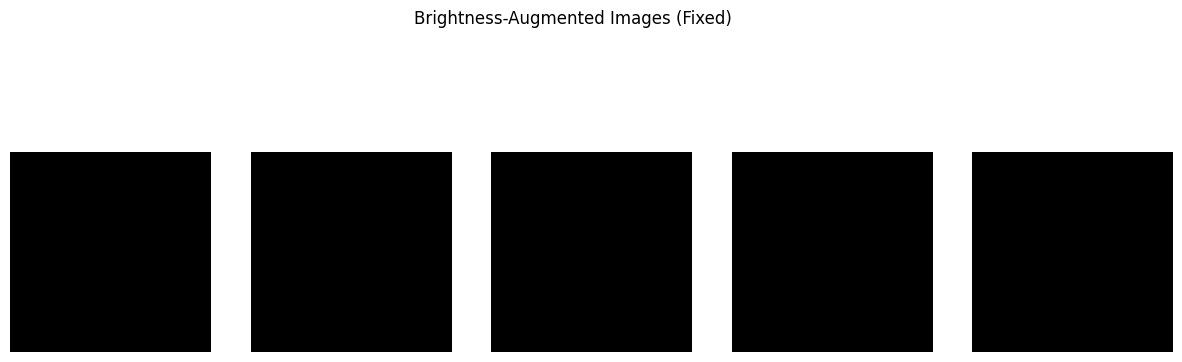

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Expand dims to match (batch, height, width, channels)
sample_image = np.expand_dims(train_images[0], axis=(0, -1))  # Shape: (1, 128, 128, 1)

# ✅ Brightness Data Generator
brightness_datagen = ImageDataGenerator(
    brightness_range=[0.8, 1.2]  # Keep range close to 1 to avoid extreme dark/light
)

# Generate and display augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, batch in enumerate(brightness_datagen.flow(sample_image, batch_size=1)):
    augmented_image = batch[0].squeeze()  # Remove batch dimension

    # ✅ Fix visualization by scaling pixel values correctly
    augmented_image = np.clip(augmented_image * 255, 0, 255).astype(np.uint8)

    axes[i].imshow(augmented_image, cmap="gray")
    axes[i].axis("off")

    if i == 4:  # Stop after 5 images
        break

plt.suptitle("Brightness-Augmented Images (Fixed)")
plt.show()


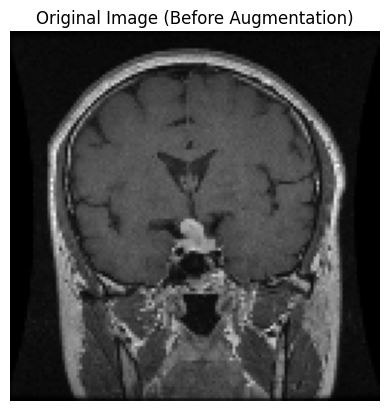

In [ ]:
import matplotlib.pyplot as plt

# Display the original image
plt.imshow(train_images[0].squeeze(), cmap="gray")
plt.title("Original Image (Before Augmentation)")
plt.axis("off")
plt.show()


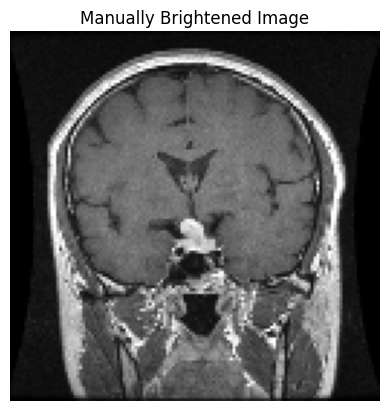

In [ ]:
brighter_image = train_images[0] * 1.5  # Increase brightness
brighter_image = np.clip(brighter_image, 0, 1)  # Ensure values are between 0-1

plt.imshow(brighter_image.squeeze(), cmap="gray")
plt.title("Manually Brightened Image")
plt.axis("off")
plt.show()


In [ ]:
print("Original Image - Min:", train_images[0].min(), "Max:", train_images[0].max())

# Generate one augmented image
batch = next(brightness_datagen.flow(sample_image, batch_size=1))
augmented = batch[0].squeeze()

print("Augmented Image - Min:", augmented.min(), "Max:", augmented.max())


Original Image - Min: 0.0 Max: 0.9019607843137255
Augmented Image - Min: 0.0 Max: 0.0


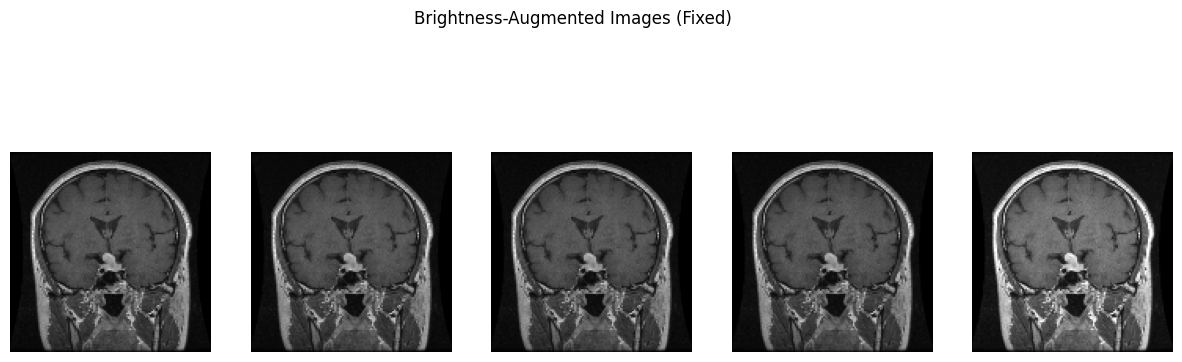

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure image is properly formatted
sample_image = np.expand_dims(train_images[0], axis=(0, -1))  # Shape (1, 128, 128, 1)
sample_image = (sample_image * 255).astype(np.uint8)  # Convert to 0-255 range

# ✅ Brightness Augmentation (Fix)
brightness_datagen = ImageDataGenerator(brightness_range=[0.5, 1.5])

# Generate & visualize
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, batch in enumerate(brightness_datagen.flow(sample_image, batch_size=1)):
    augmented_image = batch[0].squeeze()  # Remove batch dim

    axes[i].imshow(augmented_image, cmap="gray")
    axes[i].axis("off")

    if i == 4:  # Stop after 5 images
        break

plt.suptitle("Brightness-Augmented Images (Fixed)")
plt.show()


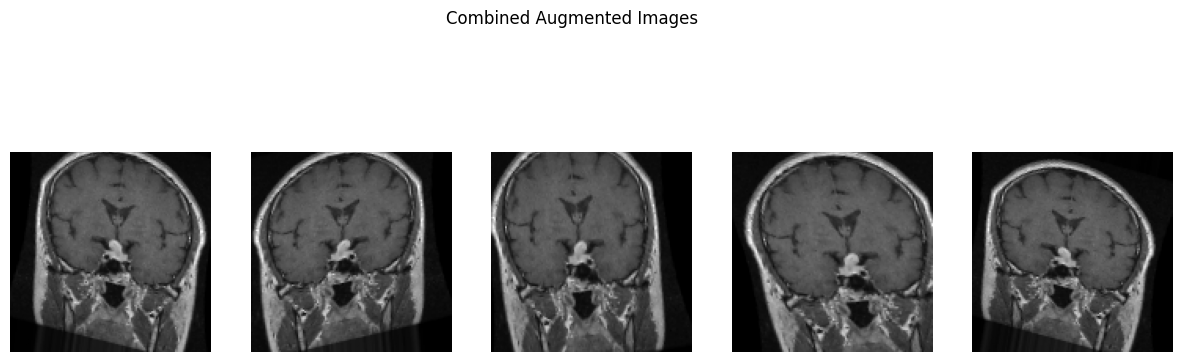

In [ ]:
# Define full augmentation pipeline
combined_datagen = ImageDataGenerator(
    rotation_range=30,      # Rotate up to 30 degrees
    width_shift_range=0.1,  # Shift width by 10%
    height_shift_range=0.1, # Shift height by 10%
    shear_range=10,         # Shear transformation
    zoom_range=0.2,         # Zoom in/out
    horizontal_flip=True,   # Flip horizontally
    brightness_range=[0.8, 1.2]  # Adjust brightness
)

# Convert grayscale image from (0-1) to (0-255)
sample_image = np.expand_dims(train_images[0], axis=(0, -1))  # Shape (1, 128, 128, 1)
sample_image = (sample_image * 255).astype(np.uint8)  # Convert to uint8

# Generate & visualize augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, batch in enumerate(combined_datagen.flow(sample_image, batch_size=1)):
    augmented_image = batch[0].squeeze()

    axes[i].imshow(augmented_image, cmap="gray")
    axes[i].axis("off")

    if i == 4:
        break

plt.suptitle("Combined Augmented Images")
plt.show()


In [ ]:
batch = next(combined_datagen.flow(sample_image, batch_size=1))
augmented = batch[0].squeeze()

print("Combined Augmented Image - Min:", augmented.min(), "Max:", augmented.max())


Combined Augmented Image - Min: 0.0 Max: 195.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(4, activation='softmax')  # 4 categories: Glioma, Meningioma, Pituitary, No Tumor
])

# Compile model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,580 (12.61 MB)

 Trainable params: 3,304,580 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train with augmented data
BATCH_SIZE = 32
EPOCHS = 15

# Reshape images for CNN (adding channel dimension)
train_images = train_images.reshape(-1, 128, 128, 1)
test_images = test_images.reshape(-1, 128, 128, 1)

# Train with augmented data
train_generator = combined_datagen.flow(train_images, train_labels, batch_size=BATCH_SIZE)

history = cnn_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=(test_images, test_labels)
)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 177s 971ms/step - accuracy: 0.2685 - loss: 1.3858 - val_accuracy: 0.3089 - val_loss: 3.3855
Epoch 2/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 167s 932ms/step - accuracy: 0.2751 - loss: 1.3761 - val_accuracy: 0.3089 - val_loss: 114.4289
Epoch 3/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 179s 998ms/step - accuracy: 0.2695 - loss: 1.3832 - val_accuracy: 0.3089 - val_loss: 13.5563
Epoch 4/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 170s 951ms/step - accuracy: 0.2793 - loss: 1.3748 - val_accuracy: 0.3089 - val_loss: 1.3693
Epoch 5/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 168s 937ms/step - accuracy: 0.2858 - loss: 1.3765 - val_accuracy: 0.3089 - val_loss: 8.7391
Epoch 6/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 172s 962ms/step - accuracy: 0.2770 - loss: 1.3918 - val_accuracy: 0.3417 - val_loss: 1.2751
Epoch 7/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 168s 941ms/step - accuracy: 0.2746 - loss: 1.3675 - val_accuracy: 0.3089 - val_loss: 1.3433
Epoch 8/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 943ms/step - accuracy: 0.2734 - loss: 1

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization

# Load the pre-trained VGG16 model (without top layers)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze base model layers (except for fine-tuning later)
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce dimensions
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)  # Prevent overfitting
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(4, activation='softmax')(x)  # 4 Classes

# Define the model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile model with lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,0

 Total params: 14,881,476 (56.77 MB)

 Trainable params: 165,764 (647.52 KB)

 Non-trainable params: 14,715,712 (56.14 MB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,   # Normalize pixel values
    rotation_range=20, # Data augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation

# Set correct dataset paths
train_dir = "/content/Brain_Tumor_MRI_Dataset/Training"
val_dir = "/content/Brain_Tumor_MRI_Dataset/Testing"

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
# Unfreeze last 4 layers of VGG16 for fine-tuning
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Recompile the model with a very low learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the fine-tuned model
history_finetune = model.fit(
    train_generator,
    epochs=10,  # Fine-tune for 10 more epochs
    validation_data=val_generator
)


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1445s 8s/step - accuracy: 0.4096 - loss: 1.4231 - val_accuracy: 0.6316 - val_loss: 1.1059
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1438s 8s/step - accuracy: 0.7180 - loss: 0.7723 - val_accuracy: 0.7735 - val_loss: 0.6633
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1434s 8s/step - accuracy: 0.7790 - loss: 0.5949 - val_accuracy: 0.8047 - val_loss: 0.5323
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1418s 8s/step - accuracy: 0.8240 - loss: 0.4803 - val_accuracy: 0.8192 - val_loss: 0.4778
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1408s 8s/step - accuracy: 0.8603 - loss: 0.4109 - val_accuracy: 0.8543 - val_loss: 0.4135
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1410s 8s/step - accuracy: 0.8778 - loss: 0.3573 - val_accuracy: 0.8429 - val_loss: 0.4267
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1446s 8s/step - accuracy: 0.8854 - loss: 0.3345 - val_accuracy: 0.8719 - val_loss: 0.3521
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1424s 8s/step - accuracy: 0.8827 - loss: 0.3281 - 

In [ ]:
import keras.saving
keras.saving.save_model(model, '/content/drive/My Drive/brain_tumor_model_vgg16.keras')

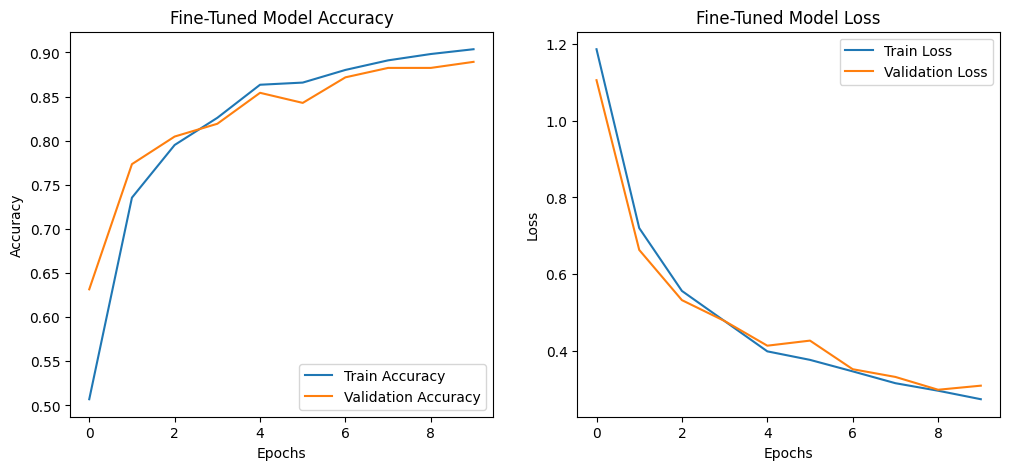

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_finetune.history['accuracy'], label='Train Accuracy')
plt.plot(history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Fine-Tuned Model Accuracy")

# Plot Loss
plt.subplot(1,2,2)
plt.plot(history_finetune.history['loss'], label='Train Loss')
plt.plot(history_finetune.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Fine-Tuned Model Loss")

plt.show()


Using image: /content/Brain_Tumor_MRI_Dataset/Testing/meningioma/Te-meTr_0002.jpg


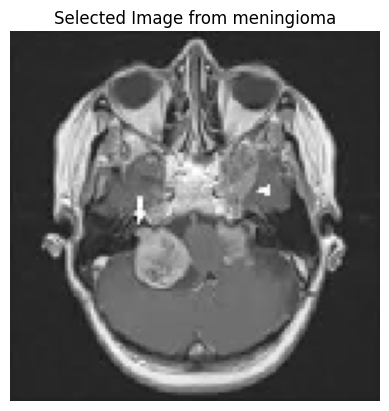

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Meningioma


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define the test dataset path
test_dir = "/content/Brain_Tumor_MRI_Dataset/Testing"  # Change if needed

# Get a random category (class folder)
category = np.random.choice(os.listdir(test_dir))

# Get a random image from the selected category
category_path = os.path.join(test_dir, category)
random_image = np.random.choice(os.listdir(category_path))

# Construct the full image path
img_path = os.path.join(category_path, random_image)

print(f"Using image: {img_path}")

# Load and preprocess the image
img = image.load_img(img_path, target_size=(128, 128), color_mode="rgb")
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Display the image
plt.imshow(img)
plt.axis("off")
plt.title(f"Selected Image from {category}")
plt.show()

# Load the trained model
model = tf.keras.models.load_model('/content/drive/My Drive/brain_tumor_model_vgg16.keras')

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Class labels (adjust if needed)
class_labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

print(f"Predicted Class: {class_labels[predicted_class]}")


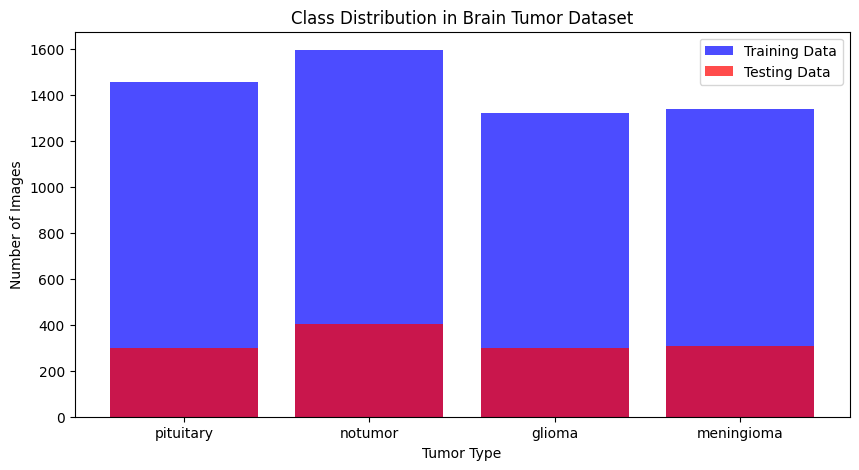

In [ ]:
import os
import matplotlib.pyplot as plt

# Define dataset paths
train_dir = "/content/Brain_Tumor_MRI_Dataset/Training"
test_dir = "/content/Brain_Tumor_MRI_Dataset/Testing"

# Count images per class
train_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in os.listdir(train_dir)}
test_counts = {cls: len(os.listdir(os.path.join(test_dir, cls))) for cls in os.listdir(test_dir)}

# Plot bar chart
plt.figure(figsize=(10,5))
plt.bar(train_counts.keys(), train_counts.values(), color='blue', alpha=0.7, label="Training Data")
plt.bar(test_counts.keys(), test_counts.values(), color='red', alpha=0.7, label="Testing Data")
plt.xlabel("Tumor Type")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Brain Tumor Dataset")
plt.legend()
plt.show()


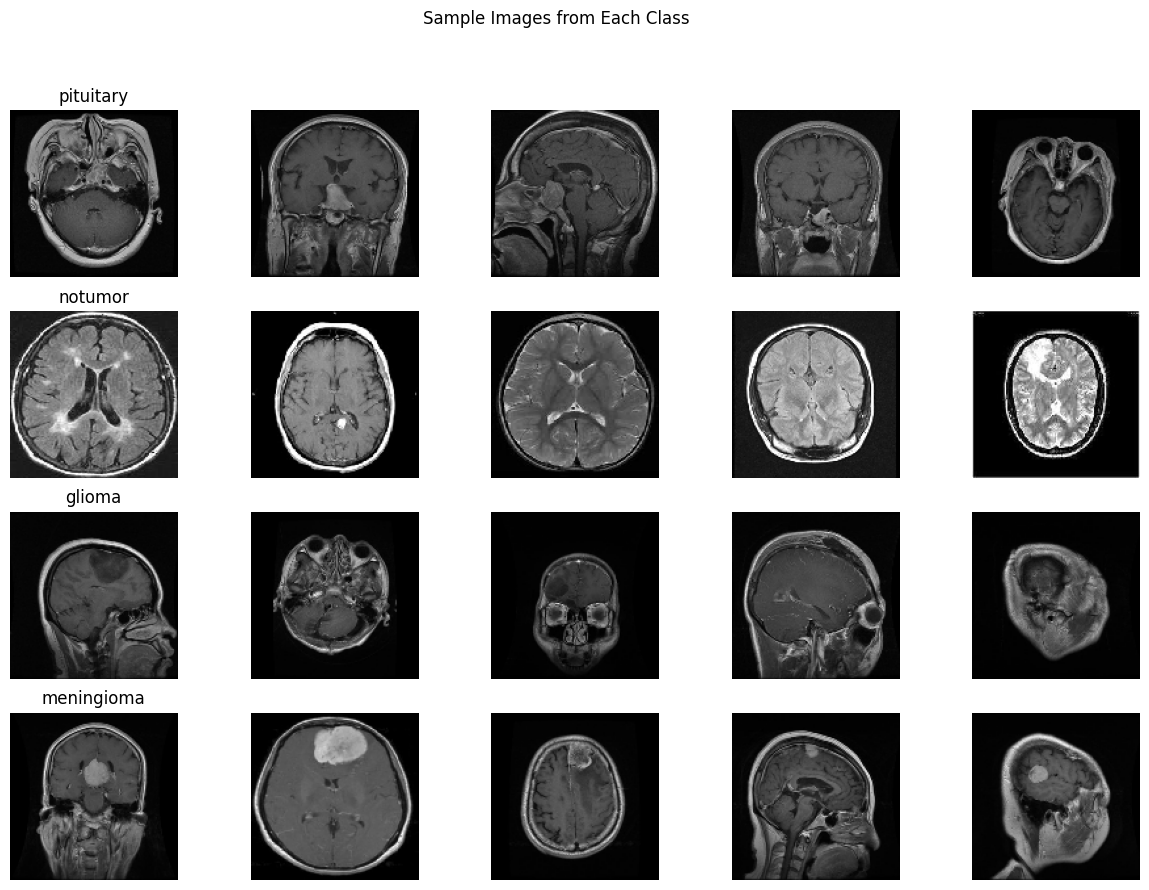

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing import image

# Function to display images from each class
def show_sample_images(dataset_path):
    categories = os.listdir(dataset_path)
    fig, axes = plt.subplots(len(categories), 5, figsize=(15, 10))

    for i, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)
        image_files = random.sample(os.listdir(category_path), 5)  # Select 5 random images

        for j, img_file in enumerate(image_files):
            img_path = os.path.join(category_path, img_file)
            img = image.load_img(img_path, target_size=(128, 128), color_mode="rgb")
            axes[i, j].imshow(img)
            axes[i, j].axis("off")
            if j == 0:
                axes[i, j].set_title(category)

    plt.suptitle("Sample Images from Each Class")
    plt.show()

# Show images
show_sample_images(train_dir)


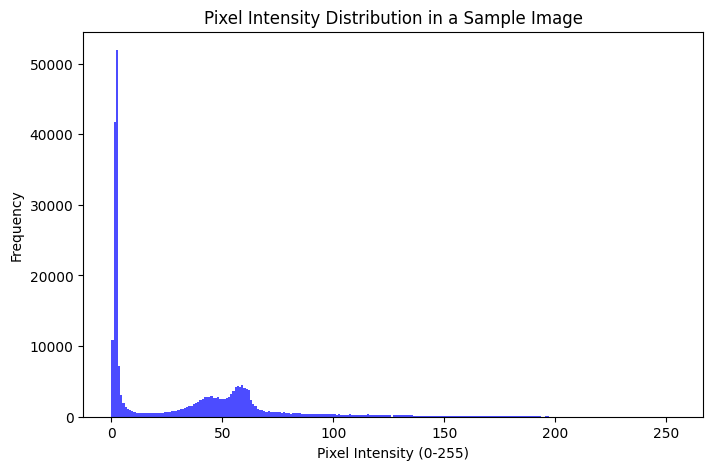

In [ ]:
import cv2
import numpy as np

# Load a sample image from the dataset
sample_img_path = os.path.join(train_dir, "glioma", os.listdir(os.path.join(train_dir, "glioma"))[0])
img = cv2.imread(sample_img_path, cv2.IMREAD_GRAYSCALE)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(img.ravel(), bins=256, color='blue', alpha=0.7)
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution in a Sample Image")
plt.show()


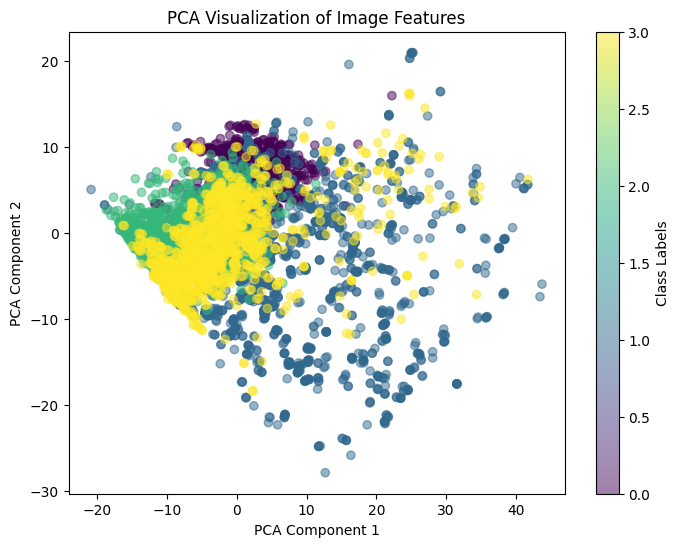

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Flatten images into feature vectors
X_flat = train_images.reshape(len(train_images), -1)

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flat)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=train_labels, cmap="viridis", alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of Image Features")
plt.colorbar(label="Class Labels")
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step


<Figure size 600x600 with 0 Axes>

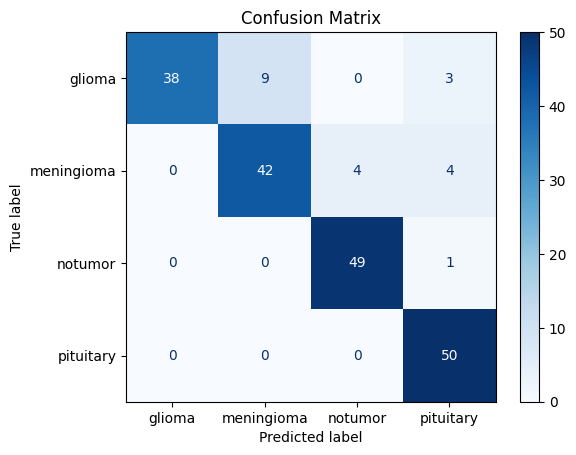

In [ ]:
import numpy as np
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ✅ Define the test dataset path
test_dir = "/content/Brain_Tumor_MRI_Dataset/Testing"

# ✅ Get class names (labels)
class_labels = sorted(os.listdir(test_dir))  # ['glioma', 'meningioma', 'notumor', 'pituitary']
num_classes = len(class_labels)

# ✅ Load test images and labels
test_images = []
test_labels = []

for label, category in enumerate(class_labels):
    category_path = os.path.join(test_dir, category)
    image_files = os.listdir(category_path)[:50]  # Use first 50 images from each class

    for img_name in image_files:
        img_path = os.path.join(category_path, img_name)

        # Load and preprocess the image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed
        img = cv2.resize(img, (128, 128))  # Resize to match model input
        img = img / 255.0  # Normalize pixel values
        test_images.append(img)
        test_labels.append(label)

# ✅ Convert to NumPy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# ✅ Load the trained model
model = tf.keras.models.load_model('/content/drive/My Drive/brain_tumor_model_vgg16.keras')

# ✅ Make predictions
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# ✅ Compute the confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)

# ✅ Display the confusion matrix
plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


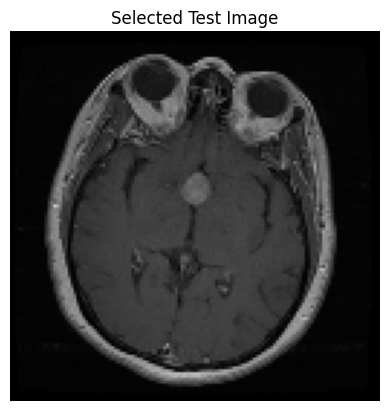

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
Predicted Class: Pituitary


In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# ✅ Use a valid image path
test_image_path = "/content/Brain_Tumor_MRI_Dataset/Testing/pituitary/Te-pi_0151.jpg"

# ✅ Load the image (ensure it has 3 channels)
img = cv2.imread(test_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed
img = cv2.resize(img, (128, 128))  # Resize to match model input
img = img / 255.0  # Normalize pixel values
img_array = np.expand_dims(img, axis=0)  # Add batch dimension

# ✅ Display the image
plt.imshow(img)
plt.axis("off")
plt.title("Selected Test Image")
plt.show()

# ✅ Load the trained model
model = tf.keras.models.load_model('/content/drive/My Drive/brain_tumor_model_vgg16.keras')

# ✅ Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# ✅ Class labels (Adjust based on dataset)
class_labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

print(f"Predicted Class: {class_labels[predicted_class]}")


In [ ]:
!rm -rf ~/.config/Google

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/"

 array.ipynb		      DVlab2.ipynb	   Map.ipynb	       MLproject.ipynb
'Copy of Medicaldata.ipynb'  'heart BMI.ipynb'	   Matrix.ipynb       'pollution plot.ipynb'
'Cric Stat.ipynb'	     'Linked data.ipynb'   Medicaldata.ipynb   Regressionlab.ipynb


In [ ]:
!cp "/content/drive/My Drive/Colab Notebooks/Medicaldata.ipynb" "/content/drive/My Drive/Colab_Backup/Medicaldata_Backup.ipynb"


In [ ]:
import shutil
import os

# Define backup folder in Google Drive
backup_folder = "/content/drive/My Drive/Colab_Backup"
os.makedirs(backup_folder, exist_ok=True)

# ✅ Copy only specific file types (e.g., images, CSVs, models)
for filename in os.listdir("/content/"):
    if filename.endswith((".csv", ".jpg", ".png", ".h5", ".keras")):  # Add more extensions if needed
        shutil.copy(f"/content/{filename}", backup_folder)

print(f"✅ Selected files saved in: {backup_folder}")


✅ Selected files saved in: /content/drive/My Drive/Colab_Backup
